<a href="https://colab.research.google.com/github/2303a52121/AIML_2303A52121/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    "Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium",
    "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins",
    "Color_Intensity", "Hue", "OD280/OD315", "Proline"]
wine_data = pd.read_csv(url, header=None, names=columns)

In [48]:
binary_data = wine_data[wine_data["Class"].isin([1, 2])]
X = binary_data[["Alcohol", "Malic_Acid"]]  # Use two features for visualization
y = binary_data["Class"].replace({1: 0, 2: 1})

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
linear_svm = SVC(kernel="linear", random_state=42)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [51]:
linear_svm = SVC(kernel="linear", random_state=42)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


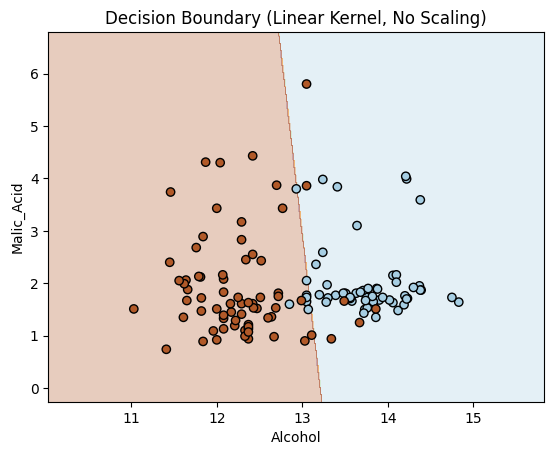

In [52]:
def plot_decision_boundary(model, X, y, title):
    X = X.values  # Convert to numpy
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Alcohol")
    plt.ylabel("Malic_Acid")
    plt.show()

plot_decision_boundary(linear_svm, X, y, "Decision Boundary (Linear Kernel, No Scaling)")

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rbf_svm = SVC(kernel="rbf", random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)


RBF Kernel SVM (With Scaling):
Accuracy: 1.00


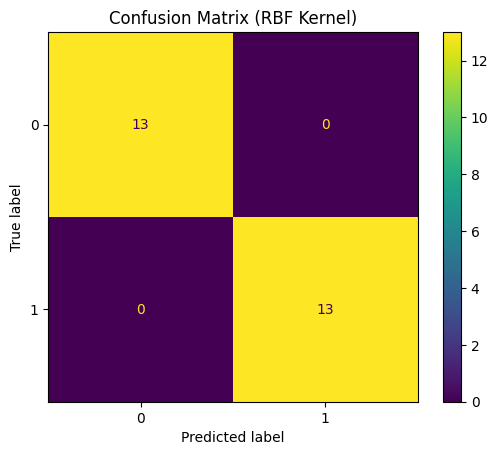

In [54]:
y_pred_rbf = rbf_svm.predict(X_test_scaled)
print("\nRBF Kernel SVM (With Scaling):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf)).plot()
plt.title("Confusion Matrix (RBF Kernel)")
plt.show()

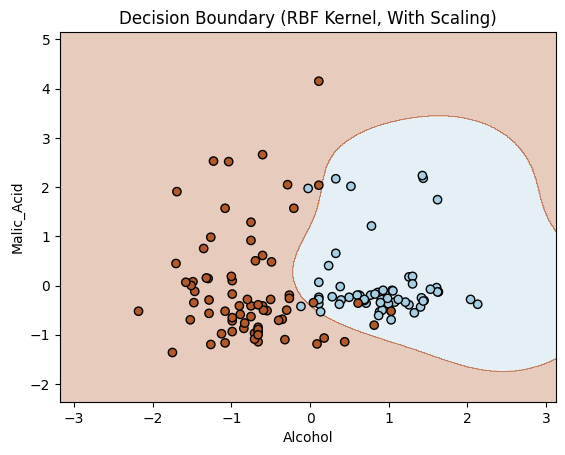

In [55]:
plot_decision_boundary(rbf_svm, pd.DataFrame(scaler.transform(X), columns=X.columns), y,
                       "Decision Boundary (RBF Kernel, With Scaling)")